In [2]:
import pandas as pd

In [77]:
df=pd.read_csv(r"E:\py-master\ML\14_naive_bayes\titanic.csv")

In [78]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [79]:
df=df.drop(["Name","PassengerId","SibSp","Parch","Ticket","Cabin","Embarked"], axis="columns")

In [80]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [81]:
df=df.dropna()

In [82]:
y=df.Survived
X=df.drop('Survived', axis='columns')

In [83]:
dummies=pd.get_dummies(X.Sex)

In [84]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [85]:
X=pd.concat([dummies, X], axis="columns")

In [86]:
X

,female,male,Pclass,Sex,Age,Fare
0,0,1,3,male,22.0,7.2500
1,1,0,1,female,38.0,71.2833
2,1,0,3,female,26.0,7.9250
3,1,0,1,female,35.0,53.1000
4,0,1,3,male,35.0,8.0500
...,...,...,...,...,...,...
885,1,0,3,female,39.0,29.1250
886,0,1,2,male,27.0,13.0000
887,1,0,1,female,19.0,30.0000
889,0,1,1,male,26.0,30.0000


In [87]:
X = X.drop('Sex', axis='columns')

In [88]:
X

,female,male,Pclass,Age,Fare
0,0,1,3,22.0,7.2500
1,1,0,1,38.0,71.2833
2,1,0,3,26.0,7.9250
3,1,0,1,35.0,53.1000
4,0,1,3,35.0,8.0500
...,...,...,...,...,...
885,1,0,3,39.0,29.1250
886,0,1,2,27.0,13.0000
887,1,0,1,19.0,30.0000
889,0,1,1,26.0,30.0000


In [89]:
X=X.drop("female", axis='columns')

In [90]:
X

,male,Pclass,Age,Fare
0,1,3,22.0,7.2500
1,0,1,38.0,71.2833
2,0,3,26.0,7.9250
3,0,1,35.0,53.1000
4,1,3,35.0,8.0500
...,...,...,...,...
885,0,3,39.0,29.1250
886,1,2,27.0,13.0000
887,0,1,19.0,30.0000
889,1,1,26.0,30.0000


In [91]:
X.isna().sum()

male      0
Pclass    0
Age       0
Fare      0
dtype: int64

In [92]:
X.size

2856

In [93]:
y.isna().sum()

0

In [94]:
X=X.dropna()

In [95]:
X.isna().sum()

male      0
Pclass    0
Age       0
Fare      0
dtype: int64

In [96]:
y.size

714

In [97]:
X.size

2856

In [98]:
X.male.size

714

In [99]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
model=GaussianNB()

In [104]:
model.fit(X_train, y_train)

GaussianNB()

In [105]:
model.score(X_test, y_test)

0.7692307692307693

In [107]:
y_test[:10]

861    0
819    0
516    1
357    0
288    1
693    0
752    0
764    0
808    0
332    0
Name: Survived, dtype: int64

In [109]:
model.predict(X_test)[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [110]:
model.predict_proba(X_test)[:10]

array([[9.07884501e-01, 9.21154991e-02],
       [9.49582901e-01, 5.04170994e-02],
       [2.62206356e-01, 7.37793644e-01],
       [2.69728060e-01, 7.30271940e-01],
       [9.22980189e-01, 7.70198114e-02],
       [9.60953387e-01, 3.90466134e-02],
       [9.64354628e-01, 3.56453725e-02],
       [9.56628829e-01, 4.33711708e-02],
       [9.21637210e-01, 7.83627905e-02],
       [1.16968259e-04, 9.99883032e-01]])

 # spam email tutorials

In [112]:
df=pd.read_csv(r"E:\py-master\ML\14_naive_bayes\spam.csv")

In [113]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [116]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [117]:
df['spam']=df['Category'].apply(lambda x: 1 if x=="spam" else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [118]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()

In [120]:
X=count.fit_transform(df.Message)

In [127]:
y=df.spam

In [128]:
X

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [129]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [132]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [133]:
model.score(X_test, y_test)

0.9760765550239234

In [134]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [139]:
y[0:5]

0    0
1    0
2    1
3    0
4    0
Name: spam, dtype: int64

In [138]:
y_test[0:5]

1218    0
3231    0
5310    0
1717    0
625     0
Name: spam, dtype: int64

In [140]:
y_pred[208]

0

In [143]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix

In [142]:
import matplotlib.pyplot as plt

In [145]:
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test, y_pred)

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

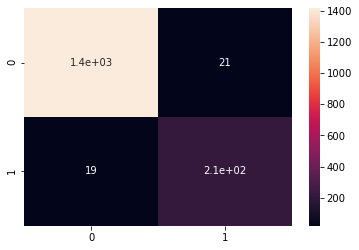

In [147]:
sn.heatmap(cm, annot=True)